In [1]:
import spot
spot.setup(show_default=".s")

In [2]:
seminator_path = '../seminator'
def seminator(filename, opt = ''):
    a = spot.automaton(f'{seminator_path} {opt} -s0 {filename} |')
    display(a)
    return a

def seminator_form(formula, opt = ''):
    a = spot.automaton(f'ltl2tgba "{formula}" | {seminator_path} {opt} -s0 |')
    display(a)
    return a

In the following automaton produced by Seminator, we have states $(\{1\},B,l)$, $(\{2\},B,l)$, and $(\{3\},B,l)$ present in different SCCs with different values of $B$ and $l$. We can only keep the copies from the most-bottom (accepting) components.

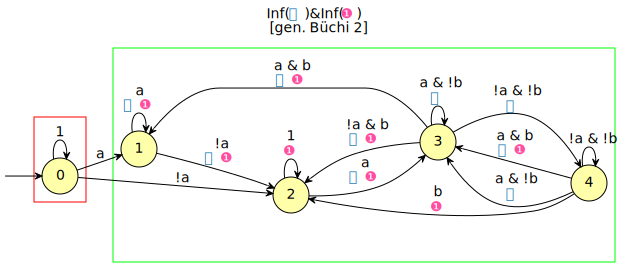

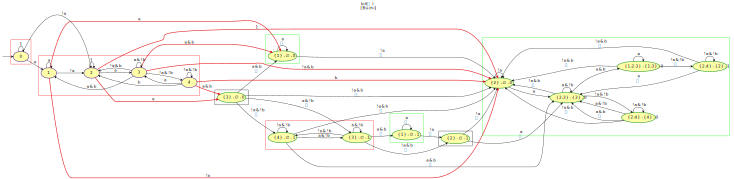

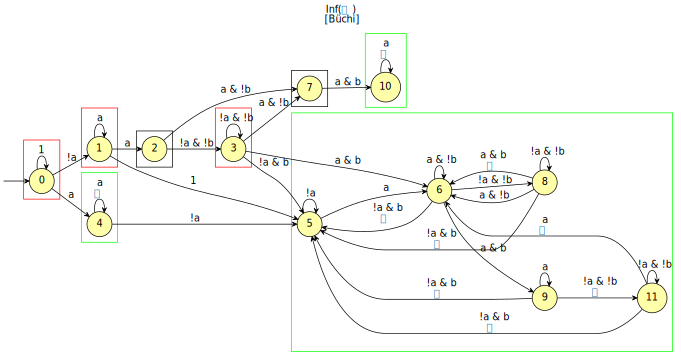

In [3]:
f = "FG(a | XF(a & XFb))"
default_option = " --skip-levels"
in_a = spot.translate(f)
display(in_a)
seminator_form(f, f'--highlight{default_option}').postprocess()

## Test implementation

In [4]:
option = "remove-prefixes"

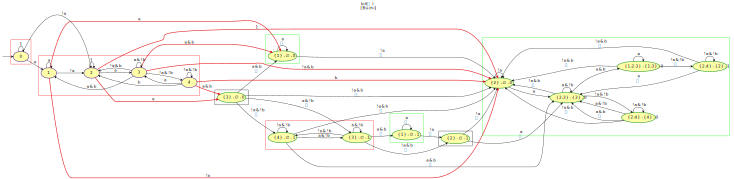

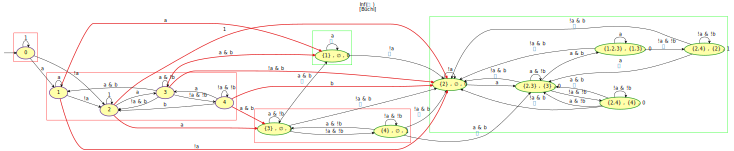

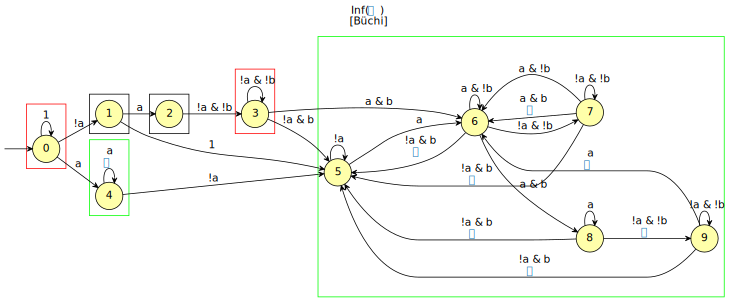

In [5]:
seminator_form(f,f"--highlight{default_option}")
res = seminator_form(f,f"--highlight{default_option} --{option}")
res.postprocess()

### Prepare test

In [6]:
print(in_a.to_str(), file=open(f"{option}.hoa",'w'))
res = !{seminator_path} -s0{default_option} --{option} {option}.hoa
result = "\n".join(res)
testfile = f"../tests/{option}.test"
test = f'''#!/bin/bash
set -e

cat >{option}.hoa <<EOF
{in_a.to_str()}
EOF

cat >{option}.expect <<EOF
{result}
EOF

seminator -s0{default_option} --{option} {option}.hoa > {option}.out
cat {option}.out
diff {option}.out {option}.expect

rm -f {option}.hoa {option}.out {option}.expect
'''

In [7]:
print(test,file=open(testfile,'w'))
!chmod +x {testfile}
!rm {option}.hoa

In [8]:
!{testfile}

HOA: v1
States: 13
Start: 0
AP: 2 "a" "b"
acc-name: Buchi
Acceptance: 1 Inf(0)
properties: trans-labels explicit-labels trans-acc complete
properties: semi-deterministic
--BODY--
State: 0 "0"
[t] 0
[0] 1
[!0] 2
State: 1 "1"
[0] 1
[!0] 2
[0] 5
[!0] 6
State: 2 "2"
[t] 2
[0] 3
[t] 6
[0] 9
State: 3 "3"
[0&1] 1
[!0&1] 2
[0&!1] 3
[!0&!1] 4
[0&1] 5
[!0&1] 6
State: 4 "4"
[1] 2
[0] 3
[!0&!1] 4
[1] 6
[0&1] 9
State: 5 "{1} , ∅ , 0"
[0] 5 {0}
[!0] 6 {0}
State: 6 "{2} , ∅ , 0"
[!0] 6
[0] 7
State: 7 "{2,3} , {3} , 0"
[!0&1] 6 {0}
[0&!1] 7
[!0&!1] 10
[0&1] 11
State: 8 "{4} , ∅ , 1"
[!0&1] 6 {0}
[0&1] 7 {0}
[!0&!1] 8
[0&!1] 9
State: 9 "{3} , ∅ , 1"
[!0&!1] 8
[0&!1] 9
[!0&1] 6 {0}
[0&1] 5 {0}
State: 10 "{2,4} , {4} , 0"
[!0&1] 6 {0}
[0&!1] 7
[0&1] 7 {0}
[!0&!1] 10
State: 11 "{1,2,3} , {1,3} , 0"
[!0&1] 6 {0}
[0] 11
[!0&!1] 12 {0}
State: 12 "{2,4} , {2} , 1"
[!0&1] 6 {0}
[0] 7 {0}
[!0&!1] 12
--END--
